In [1]:
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
air_bnb_path = "../Data-Project-1/Ashville listings.csv"
air_bnb_asheville = pd.read_csv(air_bnb_path, encoding='latin-1')
air_bnb_asheville.head()

,id,name,bedrooms,beds,bathrooms,accommodates,price,room_type,review_scores_rating,host_id,...,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6.180000e+17,Home in Asheville,1 bedroom,2 beds,3.5 baths,5,180,Entire home/apt,5.00,5376456,...,35.60141,-82.57145,30,1,8/15/2022,0.08,1,0,0,NaN
1,1.569260e+05,Hostel in Asheville,1 bedroom,6 beds,2.5 shared baths,1,26,Shared room,4.70,746673,...,35.57864,-82.59578,1,334,8/2/2023,2.28,7,323,19,NaN
2,1.568050e+05,Home in Asheville,1 bedroom,1 beds,2.5 shared baths,2,66,Private room,4.52,746673,...,35.57864,-82.59578,1,67,1/1/2020,0.46,7,0,0,NaN
3,6.765734e+06,Hostel in Asheville,1 bedroom,1 beds,2.5 shared baths,1,27,Shared room,4.73,746673,...,35.57895,-82.59566,1,104,5/21/2023,1.05,7,322,2,NaN
4,6.765832e+06,Home in Asheville,1 bedroom,1 beds,2.5 shared baths,2,66,Private room,4.74,746673,...,35.57895,-82.59566,1,81,8/19/2023,0.81,7,307,8,NaN


In [3]:
bedrooms_price_summary = air_bnb_asheville.groupby("bedrooms").agg({"price":["mean", "median", "var", "std", "sem"]})
bedrooms_price_summary

price                                              
                    mean median            var         std         sem
bedrooms                                                              
 1 bedroom    133.345286   99.0   97649.645483  312.489433    8.052354
 2 bedrooms   167.357625  148.0    7326.970580   85.597725    3.144511
 3 bedrooms   201.037770  180.0    9666.479652   98.318257    4.169623
 4 bedrooms   308.441558  262.0   47540.099831  218.036923   14.345776
 5 bedrooms   410.153846  379.0   40930.038462  202.311736   25.093682
 6 bedrooms   477.903226  397.0  125857.890323  354.764556   63.717595
 7 bedrooms   720.733333  600.0  138787.638095  372.542129   96.189964
 8 bedrooms   586.600000  521.0   91534.300000  302.546360  135.302845
 9 bedrooms   872.800000  906.0  391031.200000  625.324876  279.653786
 Studio       102.546218  100.0     988.995727   31.448302    2.882861
campsite       23.666667   22.0      76.666667    8.755950    3.574602

In [4]:
beds_price_summary = air_bnb_asheville.groupby("beds").agg({"price":["mean", "median", "var", "std", "sem"]})
beds_price_summary

price                                              
                mean median            var         std         sem
beds                                                              
 0 bed     22.750000   22.0      20.250000    4.500000    2.250000
 1 beds   121.838710   95.0   14651.857907  121.044859    3.574083
 2 beds   160.794183  125.0  149598.197234  386.779262   12.935834
 3 beds   177.558712  155.5    7652.087628   87.476212    3.806913
 4 beds   228.633758  183.0   30118.807930  173.547711    9.793864
 5 beds   249.976190  222.5   28353.580268  168.385214   12.991201
 6 beds   310.372340  268.5   55835.591055  236.295559   24.372026
 7 beds   381.833333  315.0   58589.688679  242.053070   32.939251
 8 beds   409.173913  323.0   42755.513834  206.774065   43.115373
 9 beds   514.857143  310.0  194835.362637  441.401589  117.969537
10 beds   571.600000  381.0  190661.400000  436.647913  112.742006
11 beds   585.357143  525.5   40745.939560  201.856235   53.948348
12 beds   631.875000  637.5   81927.553571  286.229896  101.197550
13 beds   494.500000  494.5    9384.500000   96.873629   68.500000
15 beds   461.500000  461.5   41760.500000  204.353860  144.500000
16 beds   295.000000  295.0            NaN         NaN         NaN
20 beds   906.000000  906.0            NaN         NaN         NaN

In [5]:
baths_price_summary = air_bnb_asheville.groupby("bathrooms").agg({"price":["mean", "median", "var", "std", "sem"]})
baths_price_summary

price                                               
                          mean  median            var         std         sem
bathrooms                                                                    
 0 baths            181.000000   151.5   10305.531915  101.516166   14.652596
 0 shared baths      75.000000    75.0            NaN         NaN         NaN
 0.5 baths           58.666667    52.5     557.866667   23.619201    9.642499
 0.5 shared baths    29.000000    29.0            NaN         NaN         NaN
 1 bath             136.754433   106.0   78773.655256  280.666448    6.506049
 1 shared bath       72.666667    58.0    2438.104418   49.377165    5.387490
 1.5 baths          145.587719   135.5    3750.226751   61.239095    5.735567
 1.5 shared baths    73.000000    49.0    5186.571429   72.017855   25.462157
 2 baths            201.054688   180.0   13769.084642  117.341743    4.638340
 2 shared baths     145.400000    90.5   24337.600000  156.005128   49.333153
 2.5 baths          215.245989   199.0    9104.261745   95.416255    6.977528
 2.5 shared baths    39.833333    27.0     410.966667   20.272313    8.276137
 3 baths            290.931677   273.0   15910.989053  126.138769    9.941128
 3.5 baths          326.307692   288.0   19476.216346  139.557215   17.309942
 4 baths            486.121951   390.0   99540.709756  315.500729   49.272936
 4.5 baths          534.400000   547.0   37101.400000  192.617237   49.733557
 4.5 shared baths  1619.000000  1619.0            NaN         NaN         NaN
 5 baths            639.214286   530.0  168697.873626  410.728467  109.771800
 5.5 baths          658.375000   627.0   53107.125000  230.449832   81.476319
 6 baths            844.111111   859.0  310796.861111  557.491579  185.830526
 6.5 baths         1007.000000  1007.0            NaN         NaN         NaN
 7 baths           1012.500000  1012.5  802644.500000  895.904292  633.500000
 9 baths            906.000000   906.0            NaN         NaN         NaN

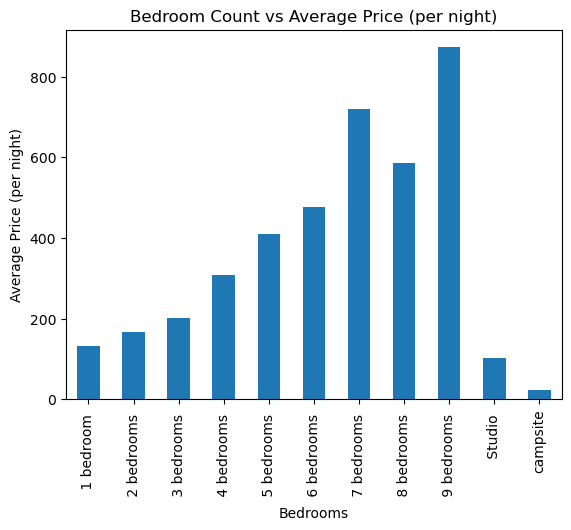

In [6]:
xvalues = air_bnb_asheville.groupby("bedrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (per night)")
plt.title("Bedroom Count vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

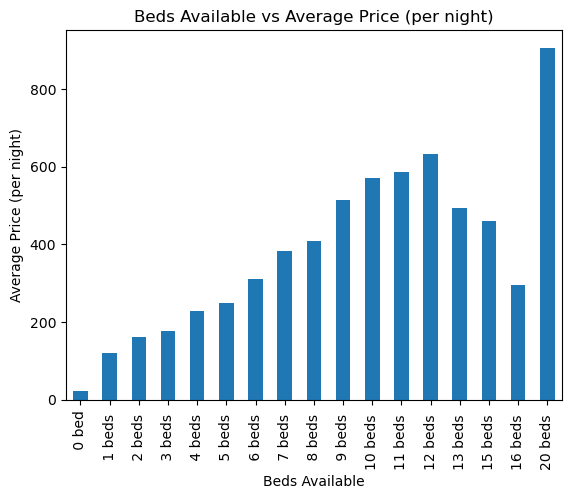

In [7]:
xvalues = air_bnb_asheville.groupby("beds")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Beds Available")
plt.ylabel("Average Price (per night)")
plt.title("Beds Available vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

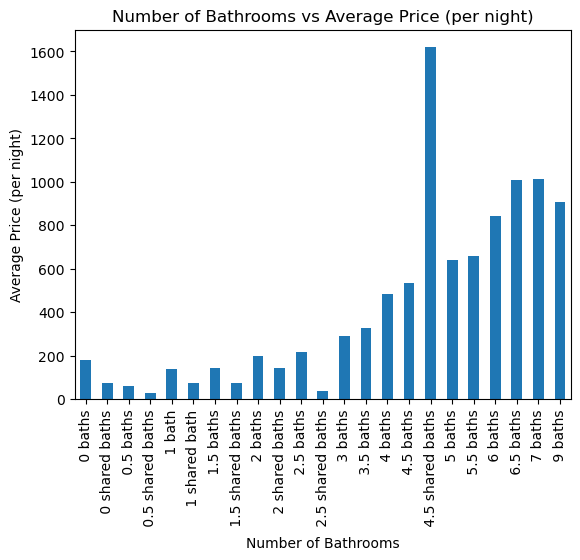

In [9]:
xvalues = air_bnb_asheville.groupby("bathrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price (per night)")
plt.title("Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [10]:
bedrooms_beds = air_bnb_asheville.groupby(['bedrooms','beds'])['price'].mean()
bedrooms_beds_df = pd.DataFrame(data=bedrooms_beds)
bedrooms_beds_df

price
bedrooms    beds                
 1 bedroom   1 beds   123.966507
             2 beds   159.797531
             3 beds   121.047619
             4 beds   104.000000
             5 beds    97.000000
...                          ...
 Studio      2 beds   104.100000
             3 beds   106.000000
             4 beds   157.000000
campsite     0 bed     22.750000
             1 beds    25.500000

[71 rows x 1 columns]

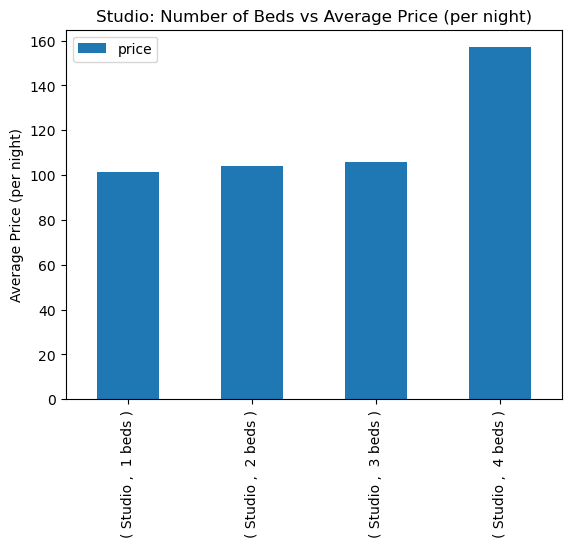

In [11]:
studio_beds = bedrooms_beds_df.iloc[65:69,:]
studio_beds.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Studio: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

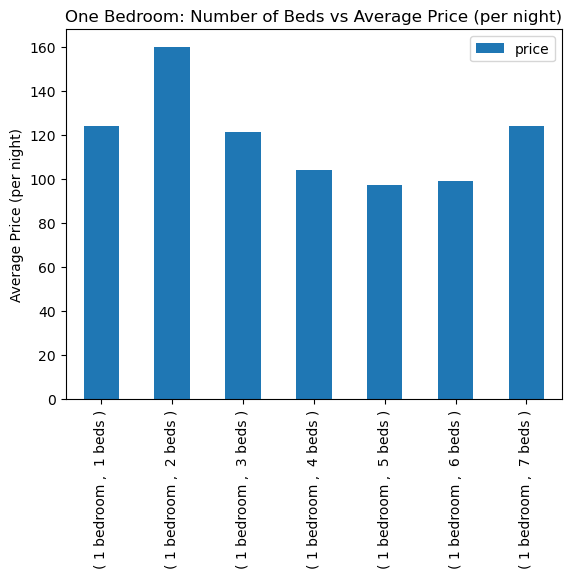

In [12]:
one_bedroom = bedrooms_beds_df.iloc[0:7,:]
one_bedroom.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("One Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

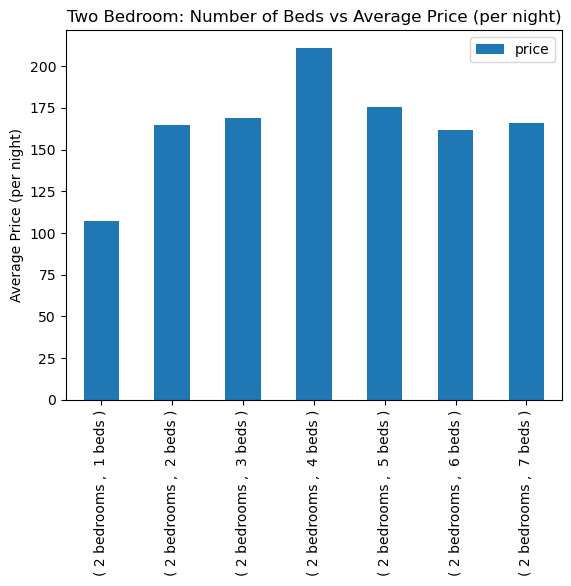

In [13]:
two_bedroom = bedrooms_beds_df.iloc[8:15,:]
two_bedroom.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Two Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

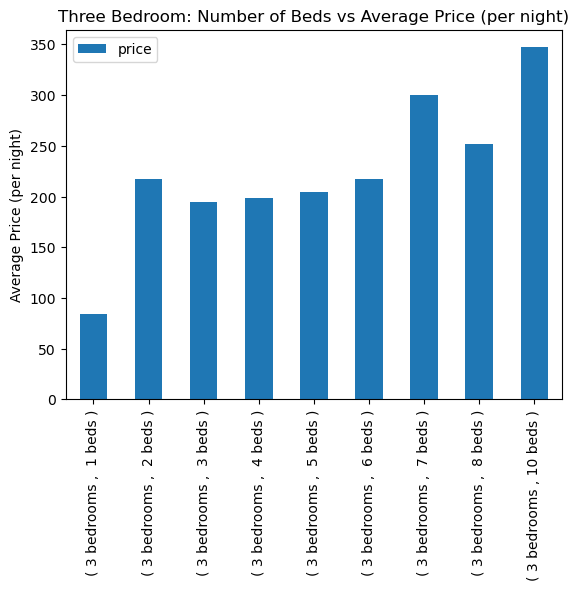

In [14]:
three_bedrooms_bed = bedrooms_beds_df.iloc[15:24,:]
three_bedrooms_bed.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Three Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [46]:
bedrooms_bathrooms = air_bnb_asheville.groupby(['bedrooms','bathrooms'])['price'].mean()
bedrooms_bathrooms_df = pd.DataFrame(data=bedrooms_bathrooms)
bedrooms_bathrooms_df

price
bedrooms    bathrooms                    
 1 bedroom   0 baths           111.600000
             0 shared baths     75.000000
             0.5 baths          62.800000
             0.5 shared baths   29.000000
             1 bath            137.918083
...                                   ...
 Studio      1 shared bath      54.000000
             1.5 baths          75.000000
campsite     0 baths            13.000000
             0.5 baths          38.000000
             1 bath             22.750000

[86 rows x 1 columns]

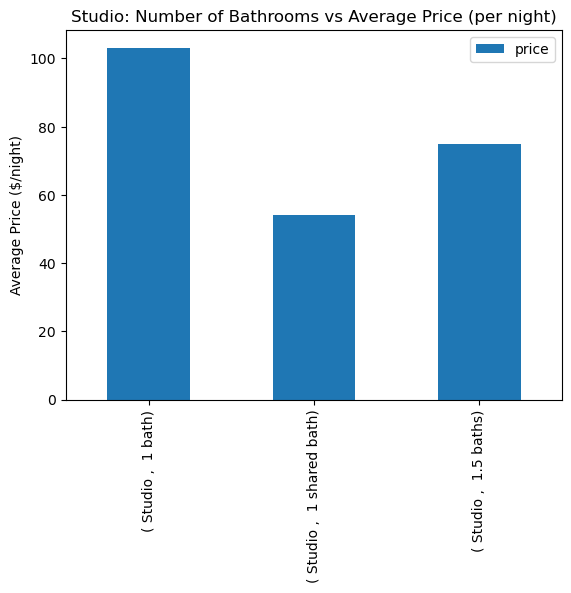

In [80]:
studio_bath = bedrooms_bathrooms_df.iloc[80:83,:]
studio_bath.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Studio: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

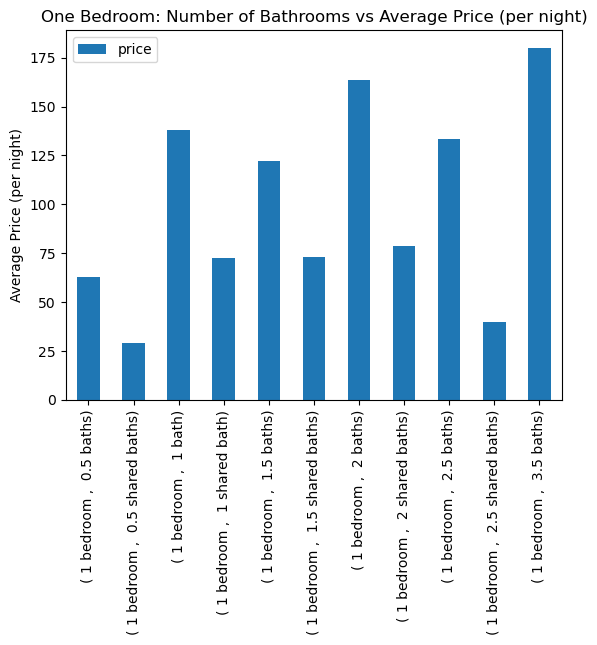

In [28]:
one_bedroom_bath = bedrooms_bathrooms_df.iloc[2:13,:]
one_bedroom_bath.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("One Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

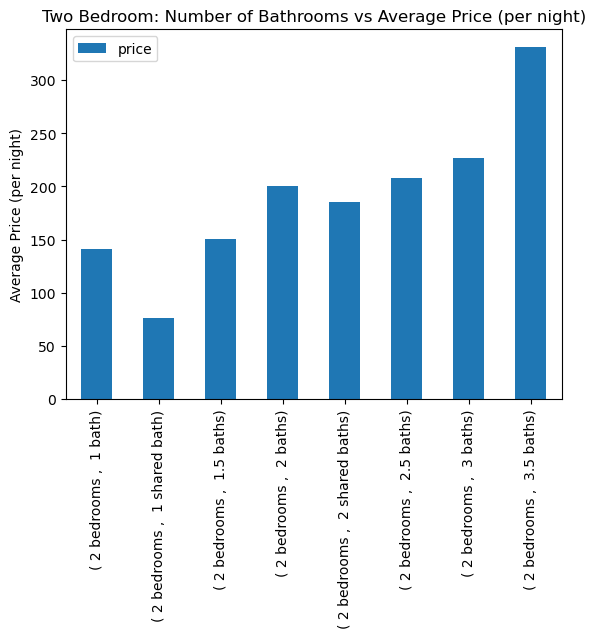

In [38]:
two_bedroom_baths = bedrooms_bathrooms_df.iloc[14:22,:]
two_bedroom_baths.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Two Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

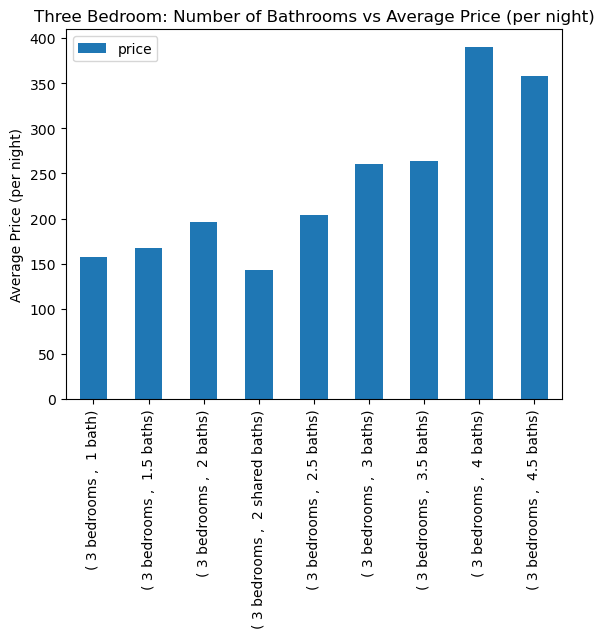

In [45]:
three_bedrooms_baths = bedrooms_bathrooms_df.iloc[23:32,:]
three_bedrooms_baths.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Three Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [77]:
types_bedrooms_price = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['price'].mean()
types_bedrooms_price_df = pd.DataFrame(data=types_bedrooms_price)
types_bedrooms_price_df.iloc[0:8,:]

price
bedrooms     room_type                  
 1 bedroom   Entire home/apt  135.391429
             Hotel room        84.000000
             Private room      77.925926
             Shared room       30.833333
 2 bedrooms  Entire home/apt  165.832952
             Private room      96.363636
 3 bedrooms  Entire home/apt  199.586207
             Private room      88.000000

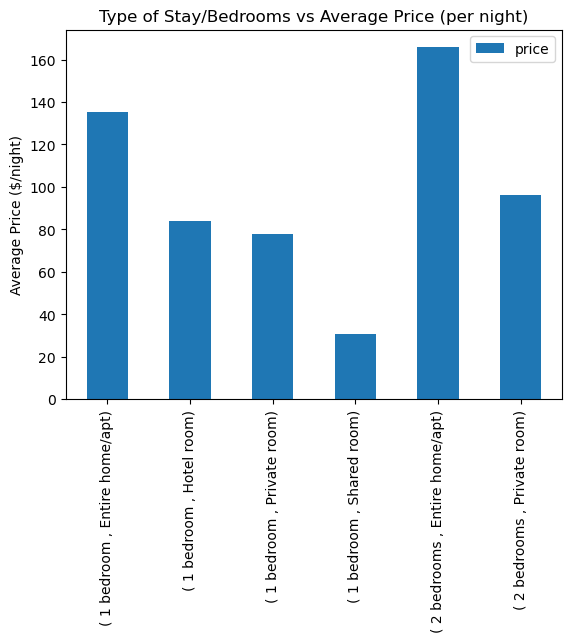

In [81]:
types_bedrooms_prices = types_bedrooms_price_df.iloc[0:6,:]
types_bedrooms_prices.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Type of Stay/Bedrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [55]:
air_bnb_asheville_reviews = air_bnb_asheville.loc[air_bnb_asheville["number_of_reviews"] > 35]
air_bnb_asheville_reviews

,id,name,bedrooms,beds,bathrooms,accommodates,price,room_type,review_scores_rating,host_id,...,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,156926.0,Hostel in Asheville,1 bedroom,6 beds,2.5 shared baths,1,26,Shared room,4.70,746673,...,35.57864,-82.59578,1,334,8/2/2023,2.28,7,323,19,NaN
2,156805.0,Home in Asheville,1 bedroom,1 beds,2.5 shared baths,2,66,Private room,4.52,746673,...,35.57864,-82.59578,1,67,1/1/2020,0.46,7,0,0,NaN
3,6765734.0,Hostel in Asheville,1 bedroom,1 beds,2.5 shared baths,1,27,Shared room,4.73,746673,...,35.57895,-82.59566,1,104,5/21/2023,1.05,7,322,2,NaN
4,6765832.0,Home in Asheville,1 bedroom,1 beds,2.5 shared baths,2,66,Private room,4.74,746673,...,35.57895,-82.59566,1,81,8/19/2023,0.81,7,307,8,NaN
5,12286328.0,Hostel in Asheville,1 bedroom,1 beds,2.5 shared baths,3,27,Shared room,4.81,746673,...,35.57893,-82.59564,1,180,9/9/2023,1.99,7,322,41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,32328388.0,Guest suite in Candler,Studio,1 beds,1 bath,4,93,Entire home/apt,4.93,16965669,...,35.56876,-82.65352,1,138,9/7/2023,2.48,3,296,7,NaN
3273,35578680.0,Rental unit in Asheville,Studio,1 beds,1 bath,4,119,Entire home/apt,4.88,250328755,...,35.58570,-82.57176,1,128,8/16/2023,2.49,15,335,10,NaN
3274,25138871.0,Campsite in Asheville,campsite,0 bed,1 bath,4,19,Entire home/apt,4.82,151279507,...,35.61165,-82.60518,1,90,8/6/2023,1.39,19,77,12,NaN
3275,26298501.0,Campsite in Asheville,campsite,0 bed,1 bath,8,28,Entire home/apt,4.80,151279507,...,35.61205,-82.60325,1,56,8/27/2023,0.88,19,176,4,NaN


In [83]:
types_bedrooms_ratings = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_rating'].mean()
types_bedrooms_ratings_df = pd.DataFrame(data=types_bedrooms_ratings)
types_bedrooms_ratings_df

review_scores_rating
bedrooms     room_type                            
 1 bedroom   Entire home/apt              4.904329
             Hotel room                   4.555000
             Private room                 4.870317
             Shared room                  4.765000
 2 bedrooms  Entire home/apt              4.898970
             Private room                 4.810909
 3 bedrooms  Entire home/apt              4.898774
             Private room                 4.890000
 4 bedrooms  Entire home/apt              4.914891
 5 bedrooms  Entire home/apt              4.881905
             Private room                 4.740000
 6 bedrooms  Entire home/apt              4.924615
 7 bedrooms  Entire home/apt              4.953333
 8 bedrooms  Entire home/apt              4.830000
 9 bedrooms  Entire home/apt              5.000000
 Studio      Entire home/apt              4.894086
             Private room                 4.970000
campsite     Entire home/apt              4.753333